<a href="https://colab.research.google.com/github/Evelyn-Rojas/Investigaci-n-de-operaciones-7MM1/blob/main/Inventario_Limitado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='deepskyblue'> **EVELYN TANIA ROJAS ROA**

---



# <font color='mediumpurple'> **Inventario de varios artículos con limitación de almacén**

---



Este modelo se aplica al caso con $n>1$ artículos cuyo inventario individual fluctúa en que no se permiten faltantes. La diferencia está en que los artículos compiten por un espacio limitado de almacenamiento.

Se definira para el artículo $i$, $i=1,2,...n$.

$D_i$ = Tasa de demanda

$K_i$ = Costo de preparación

$h_i$ = Costo unitario de almacenamiento por unidad de tiempo

$y_i$ = Cantidad de pedido

$a_i$ = Área de almacenamiento necesaria por unidad de inventario

$A$ = Área máxima disponible de almacenamiento para los $n$ artículos

> El modelo matemático será:


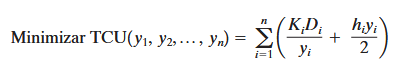

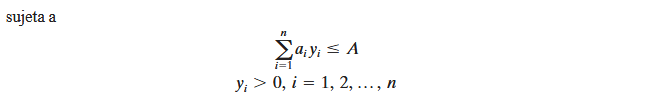

<font color='orchid'>**Pasos para resolver este tipo de problemas:**




* **Paso 1.** Calcular los valores óptimos no restringidos de las cantidades de pedido con:

$$y_i^* = \sqrt{\frac{2K_i D_i}{h_i}}, \quad i = 1, 2, \ldots, n$$

* **Paso 2.** Comprobar si los valores óptimos no restringidos $y_i$ satisfacen la restricción de almacenamiento. Si la satisfacen, detenerse; la solución $y_i^*, i$ =  $1, 2, ..., n$ es óptima. En caso contrario seguir en el paso 3.

* **Paso 3.** Se debe satisfacer la restricción del almacenamiento en forma de ecuación. Usar el
método de los multiplicadores de Lagrange para determinar los valores restringidos
óptimos de las cantidades de pedido.

La función de Lagrange será:
$$L(\lambda, y_1, y_2, \ldots, y_n) = TCU(y_1, y_2, \ldots, y_n) - \lambda \left( \sum_{i=1}^n a_i y_i - A \right)$$
$$= \sum_{i=1}^n \left( \frac{K_i D_i}{y_i} + \frac{h_i y_i}{2} \right) - \lambda \left( \sum_{i=1}^n a_i y_i - A \right)$$
donde $\lambda (< 0)$ es el multiplicador de Lagrange.

Como la función de Lagrange es convexa, los valores óptimos de $y_i$ y $\lambda$ se determinan con la siguiente condición necesaria:
$$\frac{\partial L}{\partial y_i} = - \frac{K_i D_i}{y_i^2} + \frac{h_i}{2} - \lambda a_i = 0$$
$$\frac{\partial L}{\partial \lambda} = - \sum_{i=1}^n a_i y_i + A = 0$$



---



* EJERCICIO A RESOLVER:

$$\begin{array}{l}
\begin{array}{|c|c|c|c|c|}
\hline
\text{Artículo } i & K_i (\$) & D_i \text{ (unidades por día)} & h_i (\$) & a_i (\text{ft}^2) \\
\hline
1 & 10 & 2 & 0.30 & 1 \\
\hline
2 & 5 & 4 & 0.10 & 1 \\
\hline
3 & 15 & 4 & 0.20 & 1 \\
\hline
\end{array} \\
\text{Área total disponible para almacenamiento} = 25 \text{ pies}^2 \\
\hline
\end{array}$$

In [39]:
#Importamos las librerias necesarias
import numpy as np
from scipy.optimize import root #Este módulo proporciona una variedad de funciones para la optimización y la búsqueda de raíces (subpaquete de scipy)
import matplotlib.pyplot as plt

In [34]:
#Definimos las variables de numero problema
K = np.array([10, 5, 15], dtype=float)
D = np.array([2, 4, 4], dtype=float)
h = np.array([0.30, 0.10, 0.20], dtype=float)
a = np.array([1, 1, 1], dtype=float)
A = 25.0

In [41]:
#Paso 1
y_inicial = np.sqrt(2 * K * D / h)
print("Paso 1: EOQ no restringido")
for i, y in enumerate(y_inicial): #es una función integrada utilizada para iterar sobre un iterable mientras se mantiene un contador de los elementos
    print(f"Artículo {i+1}: y* = {y:.3f}")

Paso 1: EOQ no restringido
Artículo 1: y* = 11.547
Artículo 2: y* = 20.000
Artículo 3: y* = 24.495


In [37]:
uso_almacen = np.sum(a * y_inicial)
print(f"Uso total de almacén = {uso_almacen:.3f}")
#Utilizamos un if con el fin de ver si se prosigue al paso 3 o ya terminamos
if uso_almacen <= A:
    print("La restricción se satisface. Esta es la solución óptima.")
    y_opt = y_inicial
else:
    print("La restricción no se satisface, se debe continuar al paso 3.")

Uso total de almacén = 56.042
La restricción no se satisface, se debe continuar al paso 3.


In [42]:
#Paso 3 Método de Lagrange
def ecuacion_lambda(lam):
    y = np.sqrt(2*K*D / (h - 2*lam*a))
    return np.sum(a*y) - A

sol = root(ecuacion_lambda, x0=-0.01) #La función root se utiliza para encontrar las raíces (o ceros) de un sistema de ecuaciones no lineales.
lam_opt = sol.x[0]
y_opt = np.sqrt(2*K*D / (h - 2*lam_opt*a))


In [32]:
#Imprimimos los resultados finales del método
print("Solución")
print(f"Lambda óptimo = {lam_opt:.6f}")
print("Cantidades óptimas de pedido:")
for i, y in enumerate(y_opt):
    print(f"Artículo {i+1}: y = {y:.3f}")
print(f"Uso final de almacén = {np.sum(a*y_opt):.3f}")

Solución
Lambda óptimo = -0.347958
Cantidades óptimas de pedido:
Artículo 1: y = 6.338
Artículo 2: y = 7.089
Artículo 3: y = 11.573
Uso final de almacén = 25.000
